In [1]:
from platform import python_version

#Pacotes para gráficos
from figrecipes import PlotlyFig

#Pacotes para ML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

#Pacotes para SVM
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score

#Computação cientifica e tabelas
import numpy as np
import pandas as pd
import scipy as sp

#Gráficos e visualização
import matplotlib.pyplot as plt
import seaborn as sns

#Pacote para normalização dos dados
from sklearn.preprocessing import StandardScaler

#Pacotes para ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

print(python_version())
%matplotlib inline

3.9.12


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
dados_sinteticos = pd.read_csv('synthetic_data.csv', sep = ",")
dados_sinteticos = dados_sinteticos.drop(columns=['Unnamed: 0'])

In [4]:
dados_sinteticos.head()

,relacao_AC,fibra,concentracao,massa_especifica,modulo_de_elasticidade,resist_tracao_fibra,fator_de_tenacidade
0,0.52,7,0.83,1.30,39.0,1600,4.783
1,0.50,1,0.87,7.85,210.0,1000,4.801
2,0.63,3,0.66,0.91,3.5,500,4.816
3,0.40,7,1.34,1.30,39.0,1600,4.818
4,0.38,6,1.84,2.75,95.0,3300,4.834


In [5]:
print(dados_sinteticos.dtypes)

relacao_AC                float64
fibra                       int64
concentracao              float64
massa_especifica          float64
modulo_de_elasticidade    float64
resist_tracao_fibra         int64
fator_de_tenacidade       float64
dtype: object


In [6]:
dados_sinteticos = dados_sinteticos.drop(columns=['fibra']) #Removemos a coluna referente ao tipo de fibra

In [7]:
dados_sinteticos.head()

,relacao_AC,concentracao,massa_especifica,modulo_de_elasticidade,resist_tracao_fibra,fator_de_tenacidade
0,0.52,0.83,1.30,39.0,1600,4.783
1,0.50,0.87,7.85,210.0,1000,4.801
2,0.63,0.66,0.91,3.5,500,4.816
3,0.40,1.34,1.30,39.0,1600,4.818
4,0.38,1.84,2.75,95.0,3300,4.834


In [8]:
print(dados_sinteticos.dtypes)

relacao_AC                float64
concentracao              float64
massa_especifica          float64
modulo_de_elasticidade    float64
resist_tracao_fibra         int64
fator_de_tenacidade       float64
dtype: object


# A partir deste ponto, é feita a normalização dos dados

In [9]:
x1 = dados_sinteticos.iloc[:,[5]]

In [10]:
x1

,fator_de_tenacidade
0,4.783
1,4.801
2,4.816
3,4.818
4,4.834
...,...
1948,4.762
1949,4.765
1950,4.766
1951,4.769


In [11]:
scaler = StandardScaler().fit(x1)

In [12]:
x1 = scaler.transform(x1)

In [13]:
print(x1)

[[0.69573127]
 [0.70641683]
 [0.71532146]
 ...
 [0.68563935]
 [0.68742028]
 [0.6892012 ]]


In [14]:
dados_sinteticos['fator_de_tenacidade'] = x1

In [15]:
dados_sinteticos

,relacao_AC,concentracao,massa_especifica,modulo_de_elasticidade,resist_tracao_fibra,fator_de_tenacidade
0,0.52,0.83,1.30,39.0,1600,0.695731
1,0.50,0.87,7.85,210.0,1000,0.706417
2,0.63,0.66,0.91,3.5,500,0.715321
3,0.40,1.34,1.30,39.0,1600,0.716509
4,0.38,1.84,2.75,95.0,3300,0.726007
...,...,...,...,...,...,...
1948,0.50,0.51,7.85,210.0,1000,0.683265
1949,0.63,0.78,7.85,210.0,1000,0.685046
1950,0.61,1.02,0.98,5.0,570,0.685639
1951,0.33,0.72,0.91,3.5,500,0.687420


# A partir deste ponto, é analisada a correlação entre as colunas

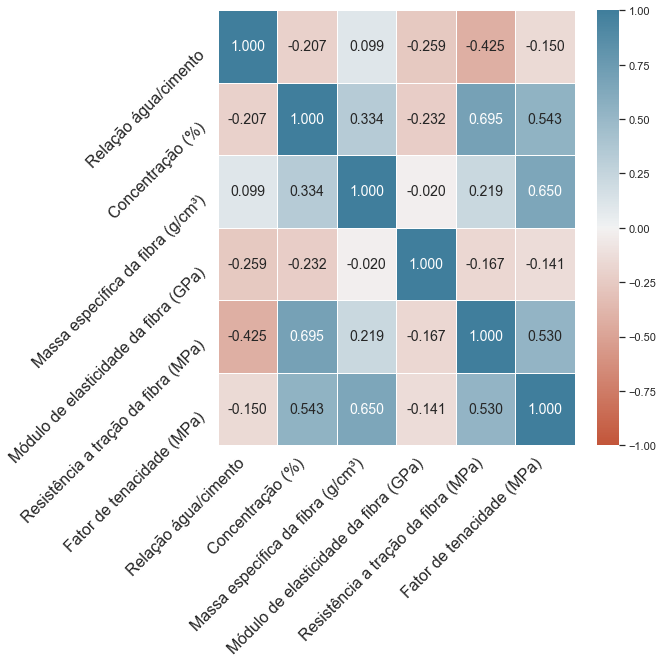

In [16]:
labels = ['Relação água/cimento', 
          'Concentração (%)', 
          'Massa específica da fibra (g/cm³)', 
          'Módulo de elasticidade da fibra (GPa)', 
          'Resistência a tração da fibra (MPa)', 
          'Fator de tenacidade (MPa)']

plt.figure(figsize=(8,8))
sns.set(font_scale=1)
sns.heatmap(dados_sinteticos.corr(), 
            annot=dados_sinteticos.corr(), 
            fmt="0.3f", 
            linewidth=1.0, 
            annot_kws={'fontsize':14, 'fontfamily': 'Arial'}, 
            cmap=sns.diverging_palette(20, 230, as_cmap=True), 
            vmin=-1.0, 
            vmax=1.0, 
            xticklabels = labels, 
            yticklabels = labels)

plt.tick_params(axis='both', labelsize=16)
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=45, verticalalignment='top')

plt.show()

# Agora sim treinar os modelos, mas usando os dados sintéticos

In [17]:
#Prepara os dados para ML
y = dados_sinteticos['fator_de_tenacidade'].values #valores a treinar
x = dados_sinteticos.drop('fator_de_tenacidade', axis=1) #descritores

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
#Criando um modelo de regressão linear múltipla
lr = LinearRegression()
modelo=lr.fit(x_train, y_train)

In [20]:
previsao = modelo.predict(x_test)

In [21]:
r2_score(y_test, modelo.fit(x_train, y_train).predict(x_test))

0.5924427717769652

In [22]:
#Exibe os coeficientes
print("Coefficients: \n", modelo.coef_)
#Exibe o R²
print("R²: %.3f" % r2_score(y_test, previsao))
#Exibe o RMSE
print("Root mean squared error: %.4f" % np.sqrt(mean_squared_error(y_test, previsao)))

Coefficients: 
 [-7.60364803e-01  2.87916649e-01  2.13284472e-01 -1.17403661e-04
  2.51875677e-04]
R²: 0.592
Root mean squared error: 0.6267


In [23]:
modelo.intercept_

-0.5843044228689841

In [24]:
def FormulaRLM(coefs, intercept):
    formula = "y = "
    for val in coefs:
        if val < 0:
            formula = formula + " - " + str(abs(val))
        else:
            formula = formula + " + " +str(abs(val))  
    
    formula = formula + " + " + str(intercept)    
    return formula

In [25]:
print(FormulaRLM(modelo.coef_, modelo.intercept_))

y =  - 0.7603648030660949 + 0.287916648572057 + 0.2132844722896253 - 0.00011740366140572376 + 0.00025187567651933224 + -0.5843044228689841


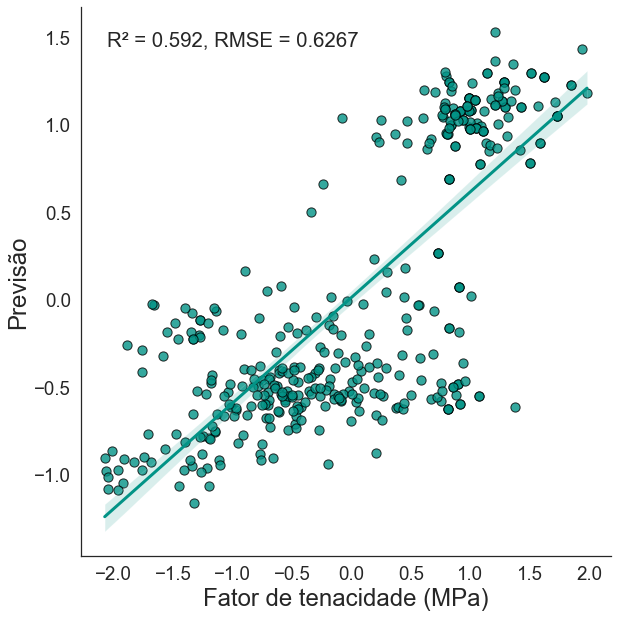

In [26]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Fator de tenacidade (MPa)'], data['Previsão'])
    r = r2_score(y_test, previsao)
    err = np.sqrt(mean_squared_error(data['Fator de tenacidade (MPa)'], data['Previsão'], squared=True))
    ax = plt.gca()
    ax.text(.05, 0.93, 'R² = {:.3f}, RMSE = {:.4f}'.format(r, err),
    transform=ax.transAxes)

df = pd.DataFrame()
df['Fator de tenacidade (MPa)'] = y_test
df['Previsão'] = previsao

sns.set(font_scale=1.7)
with sns.axes_style('white'):
    graph = sns.lmplot(x = 'Fator de tenacidade (MPa)',
                       y = "Previsão",
                       ci = 90,
                       data = df,
                       height = 9,
                       aspect = 1,
                       scatter_kws = {'s':85, 'color': '#029386', 'edgecolor': 'black'},
                       line_kws = {'lw': 3, 'color': '#029386'})

graph.set_xlabels('Fator de tenacidade (MPa)', size=24, fontfamily='Arial')
graph.set_ylabels('Previsão', size=24, fontfamily='Arial')

graph.map_dataframe(annotate)


print(graph)

# Aqui começa o Support Vector Regression

In [27]:
#Definição dos parâmetros para o SVR
param = {'kernel' : ('poly', 'rbf'),
         'C' :[1, 5, 10, 100],'degree' : [1, 2, 3],'coef0' : [0, 0.1, 0.5, 1.0],
         'gamma' : [0.01,0.05, 0.1, 0.5, 1],
         'max_iter': [10000]}
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [28]:
#Divide em treino e teste (Com 20% de teste)
x_train_SVR, x_test_SVR, y_train_SVR, y_test_SVR = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
grid = GridSearchCV(SVR(), param_grid=param, cv=cv)

In [30]:
import time

In [31]:
start_time = time.time()
grid.fit(x_train_SVR, y_train_SVR)
end_time = time.time()

In [32]:
print("--- O treinamento durou %s segundos ---" % (end_time - start_time))

--- O treinamento durou 315.9545214176178 segundos ---


In [33]:
grid.best_params_

{'C': 1,
 'coef0': 0,
 'degree': 1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': 10000}

In [34]:
grid.best_score_

0.8626548628917046

In [35]:
grid.best_index_

9

In [36]:
grid_result = pd.DataFrame(grid.cv_results_)

grid_result = grid_result.drop(columns = ['mean_score_time',
                                          'mean_fit_time',
                                          'std_fit_time',
                                          'std_score_time',
                                          'params',
                                          'split0_test_score',
                                          'split1_test_score',
                                          'split2_test_score',
                                          'split3_test_score',
                                          'split4_test_score',
                                          'std_test_score'])

grid_result

,param_C,param_coef0,param_degree,param_gamma,param_kernel,param_max_iter,mean_test_score,rank_test_score
0,1,0,1,0.01,poly,10000,-3.342191e+00,241
1,1,0,1,0.01,rbf,10000,8.118172e-01,229
2,1,0,1,0.05,poly,10000,-2.321278e+01,250
3,1,0,1,0.05,rbf,10000,8.422534e-01,217
4,1,0,1,0.1,poly,10000,-1.075770e+02,271
...,...,...,...,...,...,...,...,...
475,100,1.0,3,0.1,rbf,10000,8.605049e-01,85
476,100,1.0,3,0.5,poly,10000,-1.587431e+31,470
477,100,1.0,3,0.5,rbf,10000,8.614911e-01,61
478,100,1.0,3,1,poly,10000,-3.283468e+32,477


In [37]:
grid_result = grid_result.rename(columns = {'param_C': 'C',
                            'param_coef0': 'Coef0',
                            'param_degree': 'Degree',
                            'param_gamma': 'Gamma',
                            'param_kernel': 'Kernel',
                            'param_max_iter': 'Max iter',
                            'mean_test_score': 'Pontuação média do teste',
                            'rank_test_score': 'Posição da pontuação do teste'})

pd.options.display.float_format = '{:.3f}'.format

grid_result

,C,Coef0,Degree,Gamma,Kernel,Max iter,Pontuação média do teste,Posição da pontuação do teste
0,1,0,1,0.010,poly,10000,-3.342,241
1,1,0,1,0.010,rbf,10000,0.812,229
2,1,0,1,0.050,poly,10000,-23.213,250
3,1,0,1,0.050,rbf,10000,0.842,217
4,1,0,1,0.100,poly,10000,-107.577,271
...,...,...,...,...,...,...,...,...
475,100,1.000,3,0.100,rbf,10000,0.861,85
476,100,1.000,3,0.500,poly,10000,-15874306023236740913497125158912.000,470
477,100,1.000,3,0.500,rbf,10000,0.861,61
478,100,1.000,3,1,poly,10000,-328346820851257645524679556857856.000,477


In [38]:
grid_result.to_excel("grid_result.xlsx")

In [39]:
grid.best_estimator_

SVR(C=1, coef0=0, degree=1, gamma=1, max_iter=10000)

In [40]:
grid.best_estimator_.fit(x_train_SVR,y_train_SVR)
previsao_SVR = grid.best_estimator_.predict(x_test_SVR)

In [41]:
print(previsao_SVR)
print(y_test_SVR)

[-0.32372938 -0.93358006 -1.13796571 -0.8797825   0.98684476  0.01120628
 -1.00099118  1.12923172 -0.62865291  0.5030718   1.47640122 -0.30292665
  0.10856123 -1.74447384 -0.89634222 -0.93854632  1.02322258  1.08909729
  1.22282021  1.5041639  -0.01214939  1.377096   -0.06635243 -1.85123683
 -0.66991726 -0.86365298  0.78602309  0.76070602 -0.12092768  0.94500658
  0.87395638 -1.54960858 -0.89877494 -0.60747422 -1.47283576 -0.28639468
  1.03158904 -0.89634222 -0.17323857  1.07247013 -0.21272643 -0.51796296
  1.04725847  0.48108429  1.2601597   0.83101076  0.20287012 -0.80423887
 -0.21876765 -0.28758431 -0.98065013 -0.14004856 -0.86794754  0.64152898
  0.47381357  0.77640651  1.4280848   1.07529784  1.04641838  0.05030338
  0.70718232  0.05483456  0.24991058  1.09412482  1.00794523 -1.56208979
  0.805953   -0.59235062  0.14460515 -1.56723331 -0.60228999 -0.19153312
 -1.21176496  0.49950774 -0.59836161 -1.3690199   0.55733999 -1.80160625
  0.43641344 -0.76111643 -0.80334914 -0.41278779  0

In [42]:
print(grid.best_estimator_.score(x_train_SVR, y_train_SVR))

0.8726294110570451


In [43]:
print(grid.best_estimator_.score(x_test_SVR, y_test_SVR))

0.8571545789781212


In [44]:
pred = grid.best_estimator_.predict(x)

In [45]:
print(pred)
print(y)

[0.01120628 1.05236176 0.61521143 ... 0.18429421 0.36882944 0.49299973]
[0.69573127 0.70641683 0.71532146 ... 0.68563935 0.68742028 0.6892012 ]


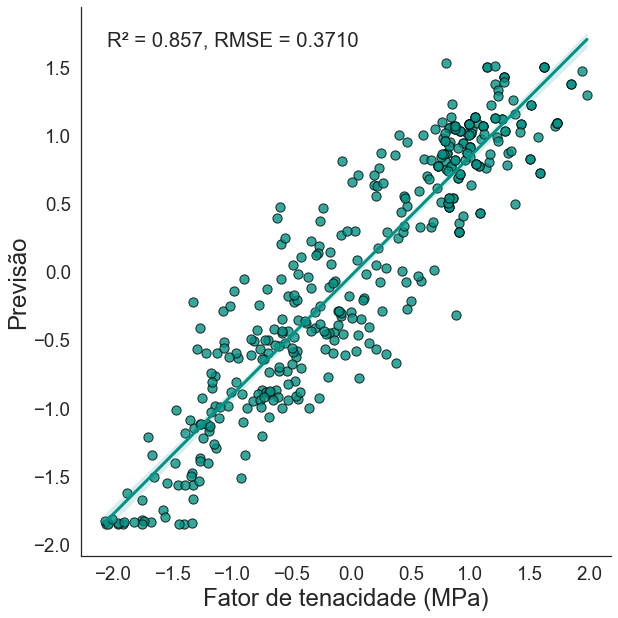

In [46]:
df = pd.DataFrame()
df['Fator de tenacidade (MPa)'] = y_test_SVR
df['Previsão'] = previsao_SVR

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Fator de tenacidade (MPa)'], data['Previsão'])
    r = r2_score(y_test_SVR, previsao_SVR)
    err = np.sqrt(mean_squared_error(data['Fator de tenacidade (MPa)'], data['Previsão'], squared=True))
    ax = plt.gca()
    ax.text(.05, 0.93, 'R² = {:.3f}, RMSE = {:.4f}'.format(r, err),
    transform=ax.transAxes)


sns.set(font_scale=1.7)
with sns.axes_style('white'):
    graph = sns.lmplot(x = 'Fator de tenacidade (MPa)',
                       y = "Previsão",
                       ci = 90,
                       data = df,
                       height = 9,
                       aspect = 1,
                       scatter_kws = {'s':85, 'color': '#029386', 'edgecolor': 'black'},
                       line_kws = {'lw': 3, 'color': '#029386'})

graph.set_xlabels('Fator de tenacidade (MPa)', size=24, fontfamily='Arial')
graph.set_ylabels('Previsão', size=24, fontfamily='Arial')

graph.map_dataframe(annotate)


print(graph)